### 인공지능특강 (한연희 교수님) HomeWork #2) Mushroom Classification

#### 2017.06.14 SeHan Lee (sehands@koreatech.ac.kr), Student ID Number: 1731036007

#### the master's course, Department of Computer Science and Engineering, KoreaTech Graduate School

<pre></pre>

## 독버섯 vs. 식용버섯 - Multi-layer Neural Network으로 구분하기

### 1. Data Set Description

- http://archive.ics.uci.edu/ml/datasets/Mushroom
- Attribute Information
    - 0 - classes (target attribute): edible=e, poisonous=p
    - 1 - cap-shape: bell=b, conical=c, convex=x, flat=f, knobbed=k, sunken=s
    - 2 - cap-surface: fibrous=f, grooves=g, scaly=y, smooth=s
    - 3 - cap-color: brown=n, buff=b, cinnamon=c, gray=g, green=r, pink=p, purple=u, red=e, white=w, yellow=y
    - 4 - bruises: bruises=t, no=f
    - 5 - odor: almond=a, anise=l, creosote=c, fishy=y, foul=f, musty=m, none=n, pungent=p, spicy=s
    - 6 - gill-attachment: attached=a, descending=d, free=f, notched=n
    - 7 - gill-spacing: close=c,crowded=w,distant=d
    - 8 - gill-size: broad=b, narrow=n
    - 9 - gill-color: black=k, brown=n, buff=b, chocolate=h, gray=g, green=r, orange=o, pink=p, purple=u, red=e, white=w, yellow=y
    - 10 - stalk-shape: enlarging=e, tapering=t
    - 11 - stalk-root: bulbous=b, club=c, cup=u, equal=e, rhizomorphs=z, rooted=r, missing=?
    - 12 - stalk-surface-above-ring: fibrous=f, scaly=y, silky=k, smooth=s
    - 13 - stalk-surface-below-ring: fibrous=f, scaly=y, silky=k, smooth=s
    - 14 - stalk-color-above-ring: brown=n, buff=b, cinnamon=c, gray=g, orange=o, pink=p, red=e, white=w, yellow=y
    - 15 - stalk-color-below-ring: brown=n, buff=b, cinnamon=c, gray=g, orange=o, pink=p, red=e, white=w, yellow=y
    - 16 - veil-type: partial=p, universal=u
    - 17 - veil-color: brown=n, orange=o, white=w, yellow=y
    - 18 - ring-number: none=n, one=o, two=t
    - 19 - ring-type: cobwebby=c, evanescent=e, flaring=f, large=l, none=n, pendant=p, sheathing=s, zone=z
    - 20 - spore-print-color: black=k, brown=n, buff=b, chocolate=h, green=r, orange=o, purple=u, white=w, yellow=y
    - 21 - population: abundant=a, clustered=c, numerous=n, scattered=s, several=v, solitary=y
    - 22 - habitat: grasses=g, leaves=l, meadows=m, paths=p, urban=u, waste=w, woods=d

<pre></pre>

### 2. Pandas DataFame 및 Numpy Array를 사용하여 데이터 준비하기

#### 1) Loading Data

처음에 실행을 할 때, scipy, pandas, matplotlib 의 경우에는 설치가 되어있지 않으므로 설치를 진행해야 한다.

- conda install scipy
- conda install pandas
- conda install matplotlib

In [2]:
import urllib
from scipy import stats
from pandas import Series, DataFrame
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

path = 'http://archive.ics.uci.edu/ml/machine-learning-databases/mushroom/agaricus-lepiota.data'
raw_csv = urllib.request.urlopen(path)
col_names = range(23)
df = pd.read_csv(raw_csv, names = col_names)
print(len(df))

8124


In [3]:
df.head()

,0,1,2,3,4,5,6,7,8,9,...,13,14,15,16,17,18,19,20,21,22
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


<pre></pre>

#### 2) Categorical Attribute를 Numerical Attribute로 변환

In [4]:
num_columns = df.shape[1]
map_dic = {}
for i in range(num_columns):
    unique_array = df[i].unique()
    N = len(unique_array)
    map_dic[i] = {}
    for j in range(N):
        map_dic[i][unique_array[j]] = j
    df[i] = df[i].map(map_dic[i])

In [5]:
df.head()

,0,1,2,3,4,5,6,7,8,9,...,13,14,15,16,17,18,19,20,21,22
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,1,0,1,0,0,1,0,...,0,0,0,0,0,0,0,1,1,1
2,1,1,0,2,0,2,0,0,1,1,...,0,0,0,0,0,0,0,1,1,2
3,0,0,1,2,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,3,1,3,0,1,1,0,...,0,0,0,0,0,0,1,1,2,1


<pre></pre>

#### 3) 각 컬럼별 Normalization

In [6]:
for i in range(1, num_columns):
    unique_array = df[i].unique()
    N = len(unique_array)
    map_dic_sub = {}
    for j in range(N):
        if j == 0:
            map_dic_sub[j] = 0
        else:
            map_dic_sub[j] = j / float(N - 1)        
    df[i] = df[i].map(map_dic_sub)

In [7]:
df.head()

,0,1,2,3,4,5,6,7,8,9,...,13,14,15,16,17,18,19,20,21,22
0,0,0.0,0.000000,0.000000,0.0,0.000,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0,0.0,0.0,0.00,0.000,0.0,0.000000
1,1,0.0,0.000000,0.111111,0.0,0.125,0.0,0.0,1.0,0.000000,...,0.0,0.0,0.0,0,0.0,0.0,0.00,0.125,0.2,0.166667
2,1,0.2,0.000000,0.222222,0.0,0.250,0.0,0.0,1.0,0.090909,...,0.0,0.0,0.0,0,0.0,0.0,0.00,0.125,0.2,0.333333
3,0,0.0,0.333333,0.222222,0.0,0.000,0.0,0.0,0.0,0.090909,...,0.0,0.0,0.0,0,0.0,0.0,0.00,0.000,0.0,0.000000
4,1,0.0,0.000000,0.333333,1.0,0.375,0.0,1.0,1.0,0.000000,...,0.0,0.0,0.0,0,0.0,0.0,0.25,0.125,0.4,0.166667


<pre></pre>

#### 4) 데이터 전처리 작업

In [8]:
data_df = df.iloc[:, 1:]

In [9]:
data_df.head()

,1,2,3,4,5,6,7,8,9,10,...,13,14,15,16,17,18,19,20,21,22
0,0.0,0.000000,0.000000,0.0,0.000,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0,0.0,0.0,0.00,0.000,0.0,0.000000
1,0.0,0.000000,0.111111,0.0,0.125,0.0,0.0,1.0,0.000000,0.0,...,0.0,0.0,0.0,0,0.0,0.0,0.00,0.125,0.2,0.166667
2,0.2,0.000000,0.222222,0.0,0.250,0.0,0.0,1.0,0.090909,0.0,...,0.0,0.0,0.0,0,0.0,0.0,0.00,0.125,0.2,0.333333
3,0.0,0.333333,0.222222,0.0,0.000,0.0,0.0,0.0,0.090909,0.0,...,0.0,0.0,0.0,0,0.0,0.0,0.00,0.000,0.0,0.000000
4,0.0,0.000000,0.333333,1.0,0.375,0.0,1.0,1.0,0.000000,1.0,...,0.0,0.0,0.0,0,0.0,0.0,0.25,0.125,0.4,0.166667


In [10]:
data_array = data_df.as_matrix()

In [11]:
print(type(data_array), data_array.shape)

<class 'numpy.ndarray'> (8124, 22)


In [12]:
label_df = df.iloc[:, 0:1]

In [13]:
label_df.head()

,0
0,0
1,1
2,1
3,0
4,1


In [14]:
label_array = label_df.as_matrix()

In [15]:
print(type(label_array), label_array.shape)

<class 'numpy.ndarray'> (8124, 1)


In [16]:
label_array_one_hot = []
for i in label_array:
    if i == 0:
        one_hot = [1, 0]
    else:
        one_hot = [0, 1]
    label_array_one_hot.append(one_hot)

In [17]:
label_array_one_hot =  np.array(label_array_one_hot)

In [18]:
print(type(label_array_one_hot), label_array_one_hot.shape)

<class 'numpy.ndarray'> (8124, 2)


In [19]:
train = {'data': None, 'labels': None}
validation = {'data': None, 'labels': None}
test = {'data': None, 'labels': None}

In [20]:
import random
pick = random.random()
train_data = []
train_labels = []
validation_data = []
validation_labels = []
test_data = []
test_labels = []
for i in range(len(data_array)):
    pick = random.random()
    if pick < 0.80:
        train_data.append(data_array[i])
        train_labels.append(label_array_one_hot[i])
    elif pick >= 0.80 and pick < 0.85:
        validation_data.append(data_array[i])
        validation_labels.append(label_array_one_hot[i])
    elif pick >= 0.85:
        test_data.append(data_array[i])
        test_labels.append(label_array_one_hot[i])
        
train['data'] = np.array(train_data)
train['labels'] = np.array(train_labels)
validation['data'] = np.array(validation_data)
validation['labels'] = np.array(validation_labels)
test['data'] = np.array(test_data)
test['labels'] = np.array(test_labels)

In [21]:
print(train['data'].shape, train['labels'].shape)

(6505, 22) (6505, 2)


In [22]:
print(validation['data'].shape, validation['labels'].shape)

(411, 22) (411, 2)


In [23]:
print(test['data'].shape, test['labels'].shape)

(1208, 22) (1208, 2)


<pre></pre>

### 3. Multi-Layer Neural Network 모델 생성 및 테스트하기

- Homework

In [25]:
print(data_df.columns.size)

22


Total batch: 22
Epoch:  1, Train Error: 8.59657, Validation Error: 8.87168, Test Accuracy: 0.41556
Epoch:  2, Train Error: 0.64302, Validation Error: 0.59996, Test Accuracy: 0.84851
Epoch:  3, Train Error: 0.35346, Validation Error: 0.32934, Test Accuracy: 0.88825
Epoch:  4, Train Error: 0.22681, Validation Error: 0.22327, Test Accuracy: 0.91805
Epoch:  5, Train Error: 0.17239, Validation Error: 0.16738, Test Accuracy: 0.92384
Epoch:  6, Train Error: 0.13547, Validation Error: 0.12429, Test Accuracy: 0.94619
Epoch:  7, Train Error: 0.11434, Validation Error: 0.09463, Test Accuracy: 0.95530
Epoch:  8, Train Error: 0.10314, Validation Error: 0.08030, Test Accuracy: 0.96109
Epoch:  9, Train Error: 0.08845, Validation Error: 0.06431, Test Accuracy: 0.96772
Epoch: 10, Train Error: 0.08009, Validation Error: 0.05633, Test Accuracy: 0.97434
Epoch: 11, Train Error: 0.07311, Validation Error: 0.04818, Test Accuracy: 0.97682
Epoch: 12, Train Error: 0.06693, Validation Error: 0.04173, Test Accura

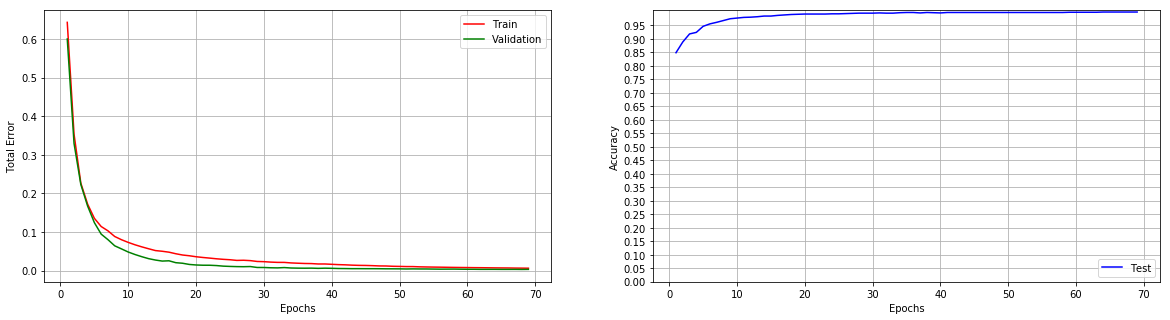

[1 1 1 ..., 1 1 1]
[1 1 1 ..., 1 1 1]
Number of False Prediction:  1
False Prediction Index: 824, Prediction: 0, Ground Truth: 1


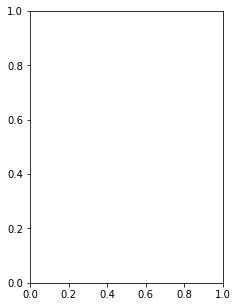

In [47]:
import tensorflow as tf
import math
import numpy as np
import matplotlib.pyplot as plt

batch_size = 300
training_epochs = 70
learning_rate = 0.05

epoch_list = []
train_error_list = []
validation_error_list = []
test_accuracy_list = []
diff_index_list = []

# Network Parameters
n_input = data_df.columns.size
n_hidden_1 = 24
n_hidden_2 = 24
n_classes = 2

# Data Preparation
x = tf.placeholder(tf.float32, [None, n_input])
y_target = tf.placeholder(tf.float32, [None, n_classes])

#Store layers weight & bias
weights = {
    'W1':tf.Variable(tf.random_normal([n_input, n_hidden_1])),
    'W2':tf.Variable(tf.random_normal([n_hidden_1, n_hidden_2])),
    'out':tf.Variable(tf.random_normal([n_hidden_2, n_classes]))
}

biases = {
    'b1':tf.Variable(tf.random_normal([n_hidden_1])),
    'b2':tf.Variable(tf.random_normal([n_hidden_2])),
    'out':tf.Variable(tf.random_normal([n_classes]))
}

# 1st Hidden layer with RELU activation
u2 = tf.matmul(x, weights['W1']) + biases['b1']
z2 = tf.nn.relu(u2)

# 2nd Hidden layer with RELU activation
u3 = tf.matmul(z2, weights['W2']) + biases['b2']
z3 = tf.nn.relu(u3)

# Output layer with linear activation
u_out = tf.matmul(z3, weights['out']) + biases['out']

# Target Setup
error = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=u_out, labels=y_target))
optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(error)

# Accuracy
prediction_and_ground_truth = tf.equal(tf.argmax(u_out, 1), tf.argmax(y_target, 1))
accuracy = tf.reduce_mean(tf.cast(prediction_and_ground_truth, tf.float32))

def draw_error_values_and_accuracy():
    # Drag Error Values and Accuracy
    flg = plt.figure(figsize=(20, 5))
    plt.subplot(121)
    plt.plot(epoch_list[1:], train_error_list[1:], 'r', label='Train')
    plt.plot(epoch_list[1:], validation_error_list[1:], 'g', label="Validation")
    plt.ylabel('Total Error')
    plt.xlabel('Epochs')
    plt.grid(True)
    plt.legend(loc='upper right')
    
    plt.subplot(122)
    plt.plot(epoch_list[1:], test_accuracy_list[1:], 'b', label='Test')
    plt.ylabel('Accuracy')
    plt.xlabel('Epochs')
    plt.yticks(np.arange(0.0, 1.0, 0.05))
    plt.grid(True)
    plt.legend(loc='lower right')
    
    # Show Graph
    plt.show()
    
def draw_false_prediction():
    if(len(diff_index_list) > 0):    #diff_index_list의 크기가 0 이상인 경우만 그래프를 나타내준다.
        fig = plt.figure(figsize=(20, 5))
    
        for i in range(len(diff_index_list)):
            j = diff_index_list[i]
            print("False Prediction Index: %s, Prediction: %s, Ground Truth: %s" % (j, prediction[j], ground_truth[j]))
            plt.subplot(150 + (i+1))
            plt.show()

def next_batch(num, data):
    # get all possible indexes
    idx = np.arange(0, len(data['data']))
    
    # shuffle indexes
    np.random.shuffle(idx)
    
    # use only 'num' random indexes
    idx = idx[0:num]
    
    # get list of 'num' random samples
    data_shuffle_data = [data['data'][i] for i in idx]
    data_shuffle_labels = [data['labels'][i] for i in idx]

    # get back numpy array
    data_shuffle_data = np.asarray(data_shuffle_data)
    data_shuffle_labels = np.asarray(data_shuffle_labels)
    
    return data_shuffle_data, data_shuffle_labels

with tf.Session() as sess:
    init = tf.global_variables_initializer()
    sess.run(init)
    
    total_batch = int(math.ceil(len(train['data'])/float(batch_size)))
    print("Total batch: %d" % total_batch)
    
    for epoch in range(training_epochs):
        epoch_list.append(epoch)
        
        # Train Error Value
        train_error_value = sess.run(error, feed_dict={x: train['data'], y_target: train['labels']})
        train_error_list.append(train_error_value)
        
        validation_error_value = sess.run(error, feed_dict={x: validation['data'], y_target: validation['labels']})
        validation_error_list.append(validation_error_value)
        
        test_accuracy_value = sess.run(accuracy, feed_dict={x: test['data'], y_target: test['labels']})
        test_accuracy_list.append(test_accuracy_value)
        print ("Epoch: {0:2d}, Train Error: {1:0.5f}, Validation Error: {2:0.5f}, Test Accuracy: {3:0.5f}".format(epoch + 1, train_error_value, validation_error_value, test_accuracy_value))
        
        for i in range(total_batch):
            batch_images, batch_labels = next_batch(batch_size, train)
            sess.run(optimizer, feed_dict={x: batch_images, y_target: batch_labels})
    
    # Draw Error Values and Accuracy Values Graph
    draw_error_values_and_accuracy()
    
    #False Prediction Profile
    prediction = sess.run(tf.argmax(u_out, 1), feed_dict={x:test['data']})
    ground_truth = sess.run(tf.argmax(y_target, 1), feed_dict={y_target:test['labels']})
    
    print(prediction)
    print(ground_truth)
    
    for i in range(test['data'].shape[0]):
        if(prediction[i] != ground_truth[i]):
            diff_index_list.append(i)
            
    print("Number of False Prediction: ", len(diff_index_list))
    
    draw_false_prediction()